In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 





## Serie de Fourier


Si $ f(t) $  es una función de variable real $t\,$, que es integrable en el intervalo $[t_0-T/2,t_0+T/2]\,$  entonces se puede obtener el desarrollo en serie de Fourier de $f(t)\,$ en ese intervalo. 
Fuera del intervalo la serie es periódica, con período $T\,$. 

Si $f(t)\,$ es periódica en toda la recta real, la aproximación por series de Fourier también será válida en todos los valores de $t\,$. 

### Serie de Fourier trigonometrica

Luego la serie de Fourier asociada a $f(t)\,$ es:


$f(t) \sim \frac{a_0}{2} + \sum_{n=1}^\infty\left[a_n\cos \left( \frac{2n\pi}{T}t \right) + b_n\sin \left( \frac{2n\pi}{T}t \right) \right]$


Donde $a_0\,$, $a_n\,$ y $b_n\,$ son los coeficientes de Fourier que toman los valores:

$ a_0 = \frac{2}{T} \int_{-T/2}^{T/2}  f(t) dt$

$ a_n = \frac{2}{T} \int_{-T/2}^{T/2}  f(t) \cos \left( \frac{2n \pi}{T} t \right) dt$

$ b_n = \frac{2}{T} \int_{-T/2}^{T/2}  f(t) \sin \left(\frac{2n\pi}{T}t\right) dt$


### Serie de Fourier exponencial
Por la identidad de Euler, las fórmulas de arriba pueden expresarse también en su forma compleja:

$ f(t) \sim \sum_{n=-\infty}^{\infty} c_{n}\,e^{2\pi i\frac{n}{T}t}.$

Los coeficientes ahora serían:

$c_n=\frac{1}{T}\int_{-T/2}^{T/2} f(t)\,e^{-2\pi i\frac {n}{T}t}\,dt.$

Otra forma de definir la serie de Fourier es:

$f(t) = \frac{a_0}{2} + \sum_{n=1}^\infty\left(a_n\cos{{\omega_n}{t}} + b_n\sin{{\omega_n}{t}}\right)$

donde
$\omega_n=n\omega$
y
$\omega=2{\pi}f=\frac{2{\pi}}{T}$

siendo:

$ a_0 = \frac{2}{T} \int_{t_0}^{t_0+T}  f(t) dt$

$ a_n = \frac{2}{T} \int_{t_0}^{t_0+T}  f(t) \cos{{\omega_n}{t}} dt$ 

$ b_n=\frac{2}{T} \int_{t_0}^{t_0+T} f(t) \sin {{\omega_n}{t}} dt.$

a esta forma de la serie de Fourier se le conoce como la series trigonométricas|serie trigonométrica de Fourier.

### Euler's formula:
$ e^{ i \theta} = cos(\theta) + i \cdot sin(\theta)$





In [2]:
# Estas funciones calculas las componentes de la serie de Fourier para una senal dada
# A cada función se pasa como argumento la señal x y el numero de armonico a calcular.
# El muestreo se define por la cantidad de muestras dentro del periodo de la señal x.

# Serie trigonometrica
def DFTT(x, k):
    N = len(x)
    a = 2/N*sum([s*np.cos(2*np.pi*i/N*k) for i,s in enumerate(x)])
    b = 2/N*sum([s*np.sin(2*np.pi*i/N*k) for i,s in enumerate(x)])
    if k == 0 : a = a /2.
    return a,b
   
# Serie exponencial    
def DFT(x, k):
    N = len(x)
    c = 1/N*sum([s*np.exp(-2j*np.pi*i/N*k) for i,s in enumerate(x)])
    return c  
    

In [3]:
# frecuancia de la señal
fm   = 10 #Hz
# Amplitud
Ac   = 1  

# senal pulso coseno de frecuencia 10 Hz, muestrea a 100 Sps (muestras por segundo). 
# En este caso N es 100
# defino el muestreo
fs = 2000 #Sps
# Muestreo: tiempo máximo del analisis (periodo de la ventana)
T = 1/fm 
# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)

# Pulso clase B (coseno)
Sm   = [Ac*np.cos(2*np.pi*fm*t) for t in time] 
# Señal Pulso de coseno
Sm   = [s if s > 0 else 0  for s in Sm] 

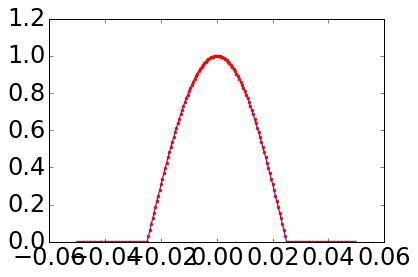

In [4]:


plt.plot(time, Sm)
plt.plot(time, Sm, 'r.')

plt.ylim([0,1.2])
plt.show()


0 2000 10.0


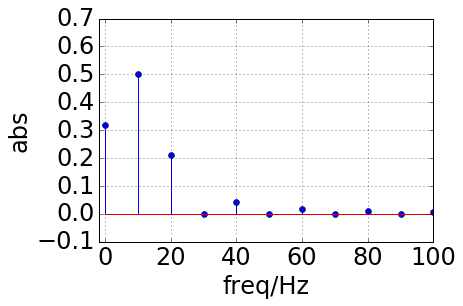

a0 =0.32
a1 =0.50
a2 =0.21
a3 =0.00


In [5]:
# Serie de Fourier Trigonometrica
# la separacion de las deltas = 1/T  
freq = np.arange(0,fs/2,1/T)
print(0,fs,1/T)
a = [DFTT(Sm,n)[0] for n in range(len(freq))]
b = [DFTT(Sm,n)[1] for n in range(len(freq))]


ab = [(a[i]+1j*b[i]) for i in range(len(a))] # debido al defasaje se emplea la variacion de j
plt.stem( freq, np.abs(ab))
plt.xlim([-2  , 100])
plt.ylim([-0.1, 0.7])
plt.ylabel('abs')
plt.xlabel('freq/Hz')
plt.grid()
plt.show()

for i in range(4):
    print('a{:1} ={:.2f}'.format(i, np.abs(ab)[i]) )

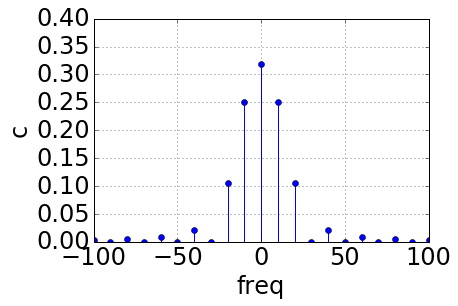

In [6]:
# Serie de Fourier Exponencial
# la separacion de las deltas = 1/T 
freq = np.arange(-(fs/2),fs/2,1/T)


l   = len(freq)
arm = np.arange(-(l/2),l/2,1)
c = [DFT(Sm,n) for n in arm]

plt.stem( freq, np.abs(c))
plt.xlim([-100, 100])
plt.ylim([0, 0.4])
plt.ylabel('c')
plt.xlabel('freq')
plt.grid()
plt.show()




## Metodo de los trapecios 

El metodo de los trapecios permite calcular las componentes de Fourier de forma aproximada empleando un muestreo discreto.

Este metodo emplea trapecios para estimar el area de calculada por la integral en las componentes de Fourier. 


$f(t) = {a_0} + \sum_{n=1}^\infty\left(a_n\cos\left( \frac{2\pi}{T}\cdot  n \cdot t \right) + b_n\sin \left( \frac{2\pi}{T} \cdot  n \cdot t \right) \right)$


siendo:

$ a_0 = \frac{1}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1} f(T_s \cdot i) \cdot T_s $

$ a_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

$ b_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \sin{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

donde:
$ T   $ es el periodo de la señal, $ T_s $ es el periodo del muestreo y $ N = \frac{T}{T_s} $

Si $N = 24$  resulta entonces (valido para una función par):

$ a_0 = \frac{1}{12} \sum_{i=0}^{\frac{N}{2}-1} f(T_s \cdot i) =  \frac{1}{12} ( \frac{A+B}{2} + \frac{B+C}{2} + \frac{C+D}{2}+ \frac{D+E}{2}+ \frac{E+F}{2}+ \frac{F+G}{2}+ \frac{G+H}{2} + \frac{H+I}{2}+ \frac{I+J}{2}+ \frac{J+K}{2} )   $

$ a_0 = \frac{1}{12} ( \frac{A}{2} + B + C + D +E+ F  + G + H + I + J + \frac{K}{2})   $


$ a_n = \frac{1}{6} \sum_{i=0}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{24} \cdot i \cdot n )} $ 

$ a_n =  \frac{1}{6} ( \frac{A}{2}  + B \cos{\frac{\pi }{12}}+ C \cos{\frac{2\cdot \pi }{12}}+ D\cos{\frac{3\cdot \pi }{12}}+ E\cos{\frac{4\cdot \pi }{12}} + F \cos{\frac{ \cdot \pi  }{12}}+ G \cos{ \frac{ \cdot \pi }{12}}+ H \cos{\frac{7 \cdot \pi }{12}}+ I \cos{\frac{8\cdot \pi }{12}}+ J \cos{\frac{9\cdot \pi }{12}}+ \frac{K}{2}\cos{\frac{10\cdot \pi }{12}} )  $


$ b_n = 0 $ 



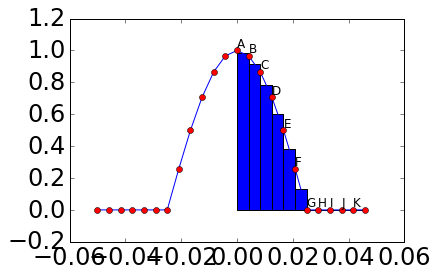

In [7]:
# senal pulso coseno de frecuencia 100 Hz, muestrea a 100e3 Sps (muestras por segundo). 
# En este caso N es 24 
# defino el sampleo
fs = fm*24 #Sps 

# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)

# Señal coseno
Sm   = [Ac*np.cos(2*np.pi*fm*t) for t in time] 
# Señal Pulso de coseno
Sm   = [s if s > 0 else 0  for s in Sm] 

# Defino el vector 
myPoint  = [ 'A','B','C','D','E','F','G','H','I','J','K']

plt.plot(time, Sm)
plt.plot(time, Sm, 'ro')
for i, mp in enumerate(myPoint):
    plt.text(time[i+12], Sm[i+12] +0.02, mp, fontsize=12)
    plt.fill_between(time[i+12:i+14], 0, (Sm[i+12] + Sm[i+13] )/2 )
plt.ylim([-0.2,1.2])
plt.show()

        


In [8]:
# Valores de las componentes
print(['{}={:.2f}'.format(mp,s) for mp,s in zip(myPoint,Sm[12:])])


['A=1.00', 'B=0.97', 'C=0.87', 'D=0.71', 'E=0.50', 'F=0.26', 'G=0.00', 'H=0.00', 'I=0.00', 'J=0.00', 'K=0.00']


In [9]:
phase = np.arange(-np.pi, np.pi, 2*np.pi/24)
# Calculo de ao, a1, a2, a3.
print('ao= 1/12*({:.2f}'.format(Sm[12]/2),''.join('{:+.2f}'.format(s) for s in (Sm[13:])),')',sep='')
print('ao= {:.2f}'.format( (Sm[12]/2+ sum(Sm[13:]))/12),sep='') 
print('')
for i in [1,2,3,4,5]:
    print('a{:1}= 1/6*({:.2f}'.format(i,Sm[12]/2),''.join('{:+.2f}'.format( (s*np.cos(p))) for p,s in zip(phase[13:]*i,Sm[13:])),')',sep='')
    a = (Sm[12]/2+ sum([(s*np.cos(p)) for p,s in zip(phase[13:]*i,Sm[13:])]  ) )/6
    print('a{:1}= {:.2f}'.format(i,a),sep='') 
    print('')

ao= 1/12*(0.50+0.97+0.87+0.71+0.50+0.26+0.00+0.00+0.00+0.00+0.00+0.00)
ao= 0.32

a1= 1/6*(0.50+0.93+0.75+0.50+0.25+0.07-0.00-0.00-0.00-0.00-0.00-0.00)
a1= 0.50

a2= 1/6*(0.50+0.84+0.43-0.00-0.25-0.22-0.00-0.00-0.00+0.00+0.00+0.00)
a2= 0.22

a3= 1/6*(0.50+0.68-0.00-0.50-0.50-0.18+0.00+0.00+0.00+0.00-0.00-0.00)
a3= -0.00

a4= 1/6*(0.50+0.48-0.43-0.71-0.25+0.13+0.00+0.00-0.00-0.00-0.00+0.00)
a4= -0.05

a5= 1/6*(0.50+0.25-0.75-0.50+0.25+0.25-0.00-0.00-0.00+0.00+0.00-0.00)
a5= -0.00



In [10]:
# senal Cuadrada
# frecuancia de la señal
fm   = 10 #Hz
# Amplitud
Ac   = 1  

# senal pulso coseno de frecuencia 10 Hz, muestrea a 100 Sps (muestras por segundo). 
# En este caso N es 100
# defino el muestreo
fs = 2000 #Sps
# Muestreo: tiempo máximo del analisis (periodo de la ventana)
T = 1/fm 
# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)

d    = 0.5
Sm   = [Ac*signal.square(2 * np.pi * fm * t,duty=d) for t in time] 


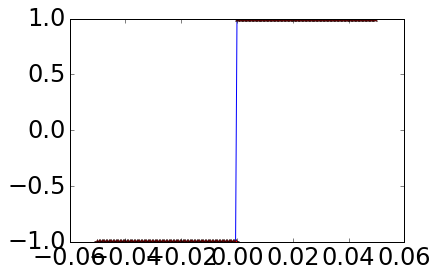

In [11]:
plt.plot(time, Sm)
plt.plot(time, Sm, 'r*')
plt.show()

0 2000 10.0


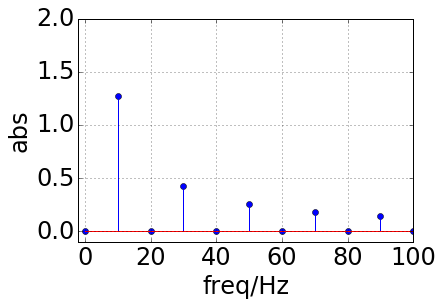

a0 =0.00
a1 =1.27
a2 =0.00
a3 =0.42
a4 =0.00
a5 =0.25
a6 =0.00


In [12]:
# Serie de Fourier Trigonometrica
# la separacion de las deltas = 1/T  
freq = np.arange(0,fs/2,1/T)
print(0,fs,1/T)
a = [DFTT(Sm,n)[0] for n in range(len(freq))]
b = [DFTT(Sm,n)[1] for n in range(len(freq))]


ab = [(a[i]+1j*b[i]) for i in range(len(a))] # debido al defasaje se emplea la variacion de j
plt.stem( freq, np.abs(ab))
plt.xlim([-2  , 100])
plt.ylim([-0.1, 2])
plt.ylabel('abs')
plt.xlabel('freq/Hz')
plt.grid()
plt.show()

for i in range(7):
    print('a{:1} ={:.2f}'.format(i, np.abs(ab)[i]) )

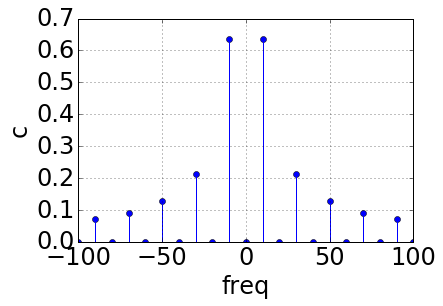

In [13]:
# Serie de Fourier Exponencial
# la separacion de las deltas = 1/T 
fmax = 100
freq = np.arange(-(fs/2),fs/2,1/T)


l   = len(freq)
arm = np.arange(-(l/2),l/2,1)
c = [DFT(Sm,n) for n in arm]

plt.stem( freq, np.abs(c))
plt.xlim([-fmax, fmax])
#plt.ylim([0, 0.9])
plt.ylabel('c')
plt.xlabel('freq')
plt.grid()
plt.show()




In [14]:
# senal Triangular
# frecuancia de la señal
fm   = 10 #Hz
# Amplitud
Ac   = 1  

# senal pulso coseno de frecuencia 10 Hz, muestrea a 100 Sps (muestras por segundo). 
# En este caso N es 100
# defino el muestreo
fs = 2000 #Sps
# Muestreo: tiempo máximo del analisis (periodo de la ventana)
T = 1/fm 
# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)
wd   = 0.5
Sm   = [Ac*signal.sawtooth(2 * np.pi * fm * t+np.pi, width = wd) for t in time] 

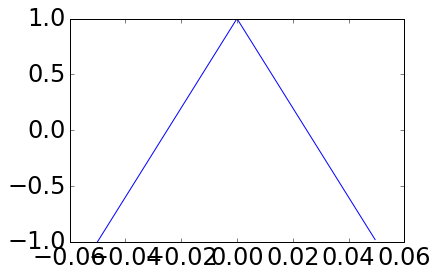

In [15]:
plt.plot(time, Sm)
plt.show()

0 2000 10.0


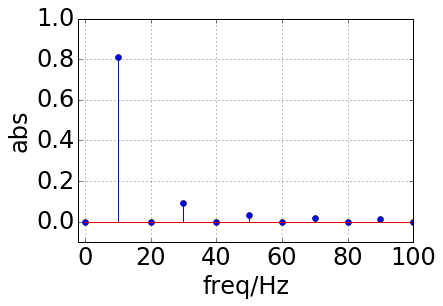

a0 =0.00
a1 =0.81
a2 =0.00
a3 =0.09


In [16]:
# Serie de Fourier Trigonometrica
# la separacion de las deltas = 1/T  
freq = np.arange(0,fs/2,1/T)
print(0,fs,1/T)
a = [DFTT(Sm,n)[0] for n in range(len(freq))]
b = [DFTT(Sm,n)[1] for n in range(len(freq))]


ab = [(a[i]+1j*b[i]) for i in range(len(a))] # debido al defasaje se emplea la variacion de j
plt.stem( freq, np.abs(ab))
plt.xlim([-2  , 100])
plt.ylim([-0.1, 1])
plt.ylabel('abs')
plt.xlabel('freq/Hz')
plt.grid()
plt.show()

for i in range(4):
    print('a{:1} ={:.2f}'.format(i, np.abs(ab)[i]) )

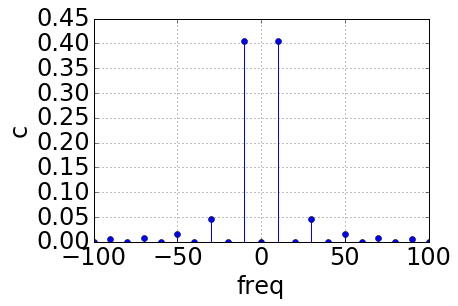

In [17]:
# Serie de Fourier Exponencial
# la separacion de las deltas = 1/T 
fmax = 100
freq = np.arange(-(fs/2),fs/2,1/T)


l   = len(freq)
arm = np.arange(-(l/2),l/2,1)
c = [DFT(Sm,n) for n in arm]

plt.stem( freq, np.abs(c))
plt.xlim([-fmax, fmax])
#plt.ylim([0, 0.9])
plt.ylabel('c')
plt.xlabel('freq')
plt.grid()
plt.show()


